In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N, D, H = 64, 1000, 100
x=tf.placeholder(tf.float32, shape=(N, D))
y=tf.placeholder(tf.float32, shape=(N, D))
w1=tf.Variable(tf.random_normal((D, H)))
w2=tf.Variable(tf.random_normal((H, D)))


In [9]:
h=tf.maximum(tf.matmul(x, w1), 0)
y_pred=tf.matmul(h, w2)
loss=tf.losses.mean_squared_error(y_pred, y)
optimizer=tf.train.GradientDescentOptimizer(1e-3)
updates=optimizer.minimize(loss)


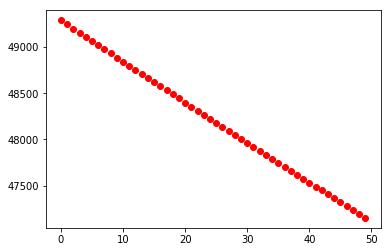

49290.816 47149.54


In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}
    steps=50
    loss_summary=[]
    for t in range(steps):
        loss_val,_=sess.run([loss , updates], feed_dict=values)
        loss_summary.append(loss_val)
    plt.plot(range(steps), loss_summary, 'ro',label='loss_value')
    plt.show()
    print(loss_summary[0],loss_summary[steps-1])